In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [8]:
import requests
import io
import os

def _csv_from_path_or_url(path, url):
    if os.path.isfile(path):
        return path
    else:
        r = requests.get(url)
        r.raise_for_status()
        # After fetching from the URL, cache at the path
        contents = r.text
        with open(path, "w") as f:
            f.write(contents)
        return path

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               40 non-null     object
 1   days_since_feb_17  40 non-null     int64 
 2   active_cases       40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


(None,
    date  days_since_feb_17  active_cases
 0  2/18                  1            19
 1  2/19                  2            35
 2  2/20                  3            87
 3  2/21                  4           186
 4  2/22                  5           413,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20ac33e370>)

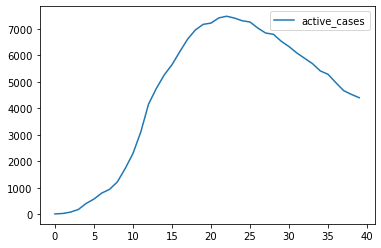

In [7]:
csv = _csv_from_path_or_url(
    path="south-korea-active-cases.csv",
    url="https://qbin.io/bs-mixed-gv7a/raw",
)
df = pd.read_csv(csv)
(df.info(), df.head(), df.plot(y='active_cases'))

Try fitting "Gaussian" with form $f(x) = a e^{-\frac{(x - m)^2}{b}}$:

In [4]:
def gaussian(x, a, b, m):
    return a * np.exp(-(x - m)**2 / b)

f ~ a exp(-(x-m)^2 / b)
a_fit=7442.849126362157 b_fit=90.05465216823694 m_fit=20.970265355238777




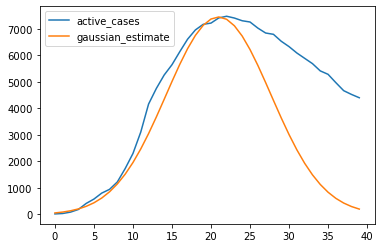

In [5]:
pre_peak_data = df[df['days_since_feb_17'] < 24]
((a_fit, b_fit, m_fit), cov) = curve_fit(
    gaussian,
    xdata=pre_peak_data['days_since_feb_17'],
    ydata=pre_peak_data['active_cases'],
    p0=[1000, 10, 20],
)
print(f"f ~ a exp(-(x-m)^2 / b)")
print(f"{a_fit=} {b_fit=} {m_fit=}")
print("\n")
df['gaussian_estimate'] = [gaussian(x, a_fit, b_fit, m_fit) for x in df.index]
df.plot(y=['active_cases', 'gaussian_estimate'])